In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')
df.head()
df = df.iloc[:,1:-2]

## Data EDA

In [ ]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

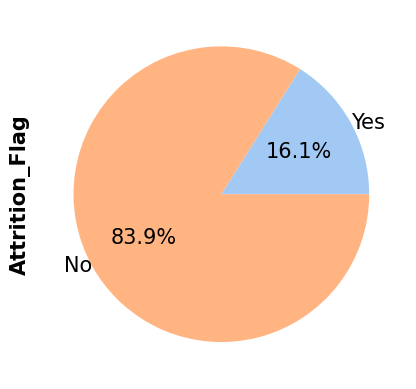

In [ ]:
# 반응변수 확인
Attrition_ratio = np.unique(df['Attrition_Flag'], return_counts=True)
Y = Attrition_ratio[1][0]
N = Attrition_ratio[1][1]
ratio = [Y, N]
labels = ['Yes', 'No']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(ratio, labels = labels, labeldistance=1, colors = colors, autopct='%.1f%%', textprops={'fontsize': 15})
plt.rc('font', size=20, weight="bold")
plt.ylabel('Attrition_Flag',size = 15, weight="bold")
plt.show()

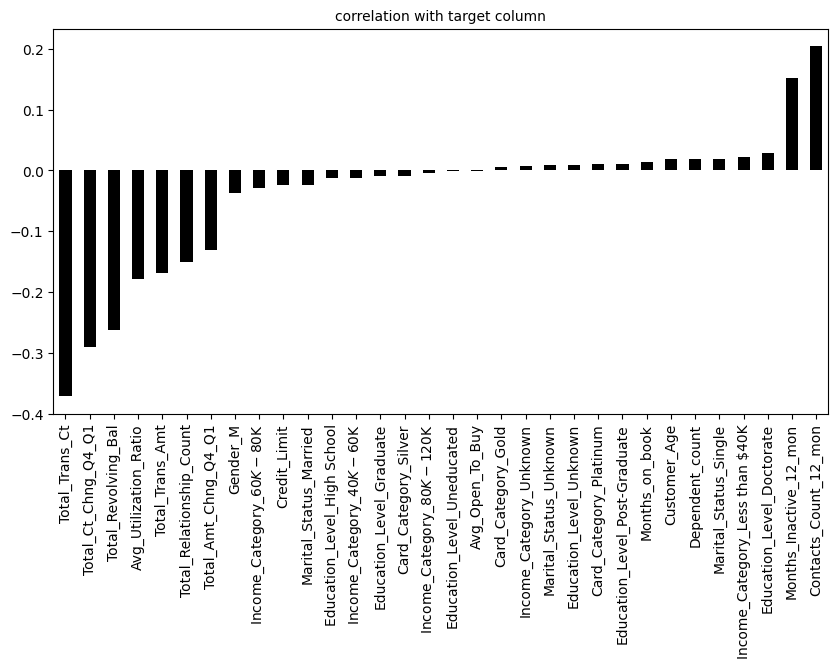

In [ ]:
# checking correlation with target column
df['Attrition_Flag']=df['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

plt.figure(figsize=(10,5))
pd.get_dummies(df,drop_first=True).corr()['Attrition_Flag'].sort_values()[:-1].plot(kind='bar',color = 'black')
plt.title('correlation with target column',size = 10)
plt.rc('font', size=10, weight = 'normal')
plt.rc('axes', labelsize=10)
plt.xticks(fontsize=10, weight = 'normal')
plt.yticks(fontsize=10, weight = 'normal')

# checking correlation with target column
df['Attrition_Flag']=df['Attrition_Flag'].map({0 : 'Existing Customer', 1: 'Attrited Customer'})

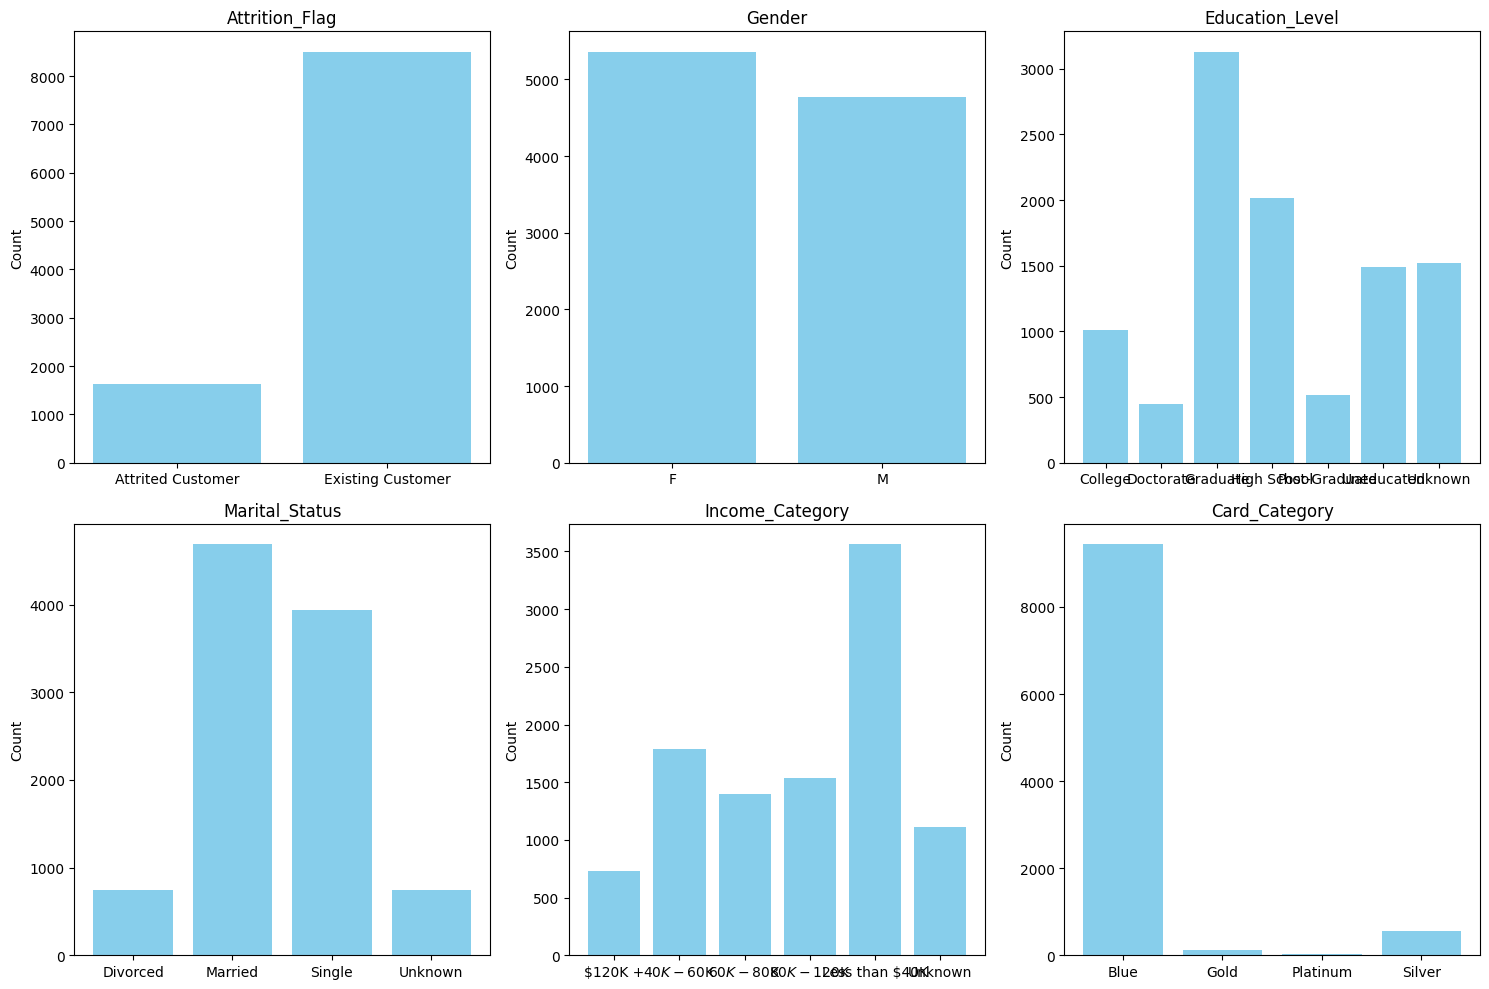

In [ ]:
# 명목형 변수 확인
object_list = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

# 2x3 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.ravel()):
    tmp_df = df[object_list[i]]
    unique_categories, category_counts = np.unique(tmp_df, return_counts=True)
    ax.bar(unique_categories, category_counts, color='skyblue')
    ax.set_title(object_list[i])
    ax.set_ylabel('Count')
    ax.set_xticks(unique_categories)  # x축 눈금 설정
    #ax.set_xticklabels(unique_categories, rotation=45)  # x축 눈금 레이블 설정
plt.tight_layout()
plt.show()

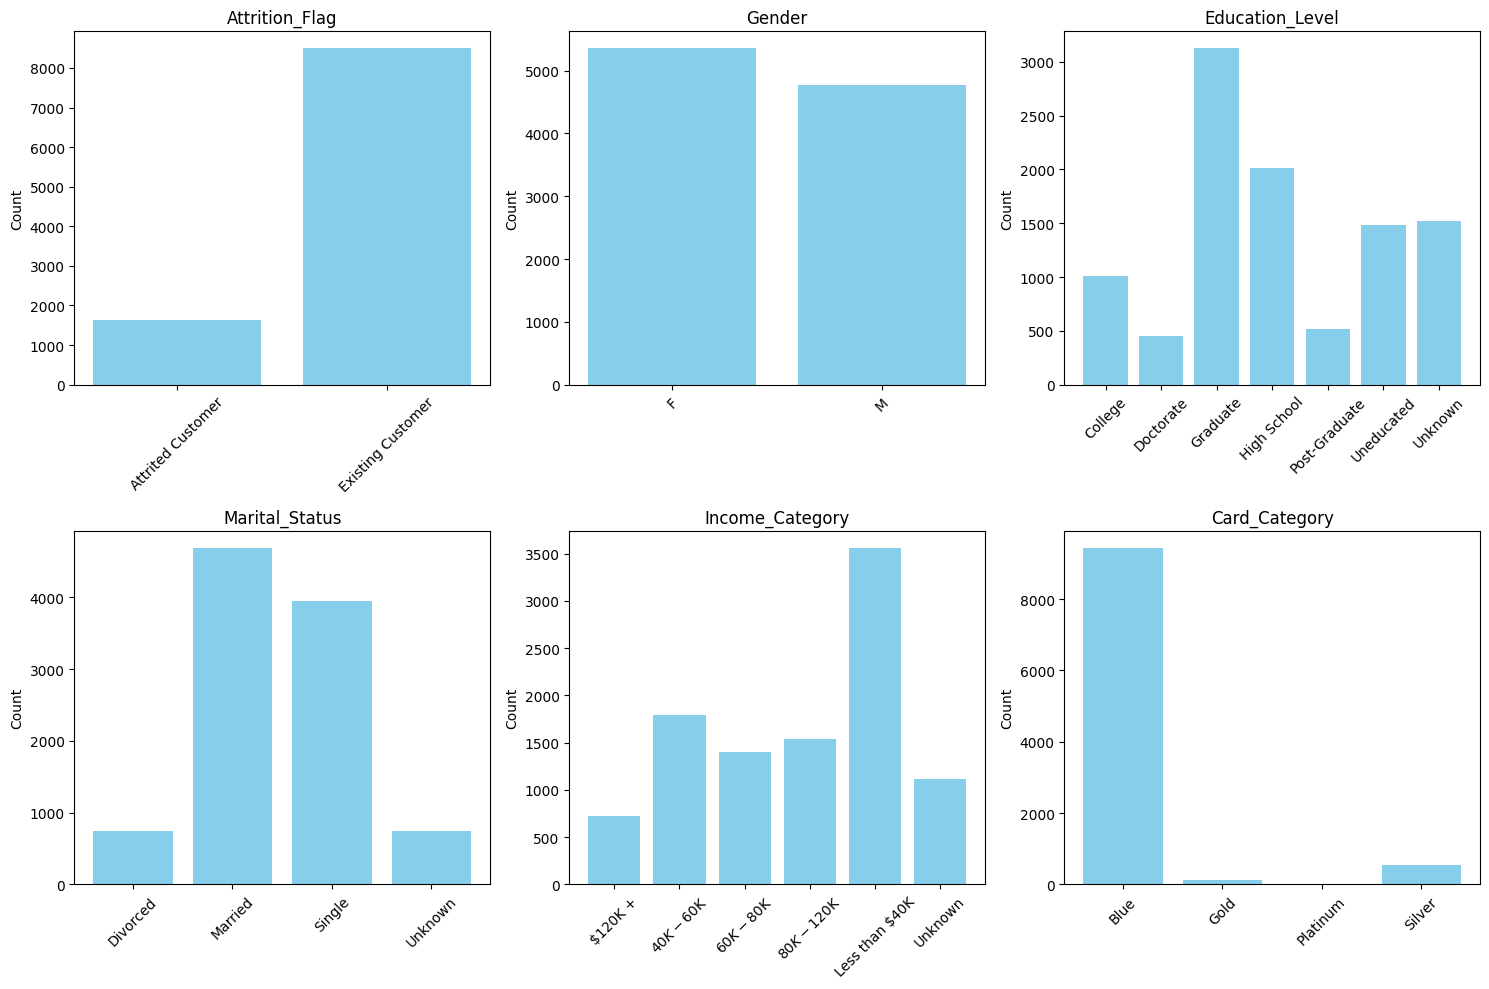

In [ ]:
# 명목형 변수 확인
object_list = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

# 2x3 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.ravel()):
    tmp_df = df[object_list[i]]
    unique_categories, category_counts = np.unique(tmp_df, return_counts=True)
    ax.bar(unique_categories, category_counts, color='skyblue')
    ax.set_title(object_list[i])
    ax.set_ylabel('Count')
    ax.set_xticks(unique_categories)  # x축 눈금 설정
    ax.set_xticklabels(unique_categories, rotation=45)  # x축 눈금 레이블 설정
plt.tight_layout()
plt.show()

In [ ]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

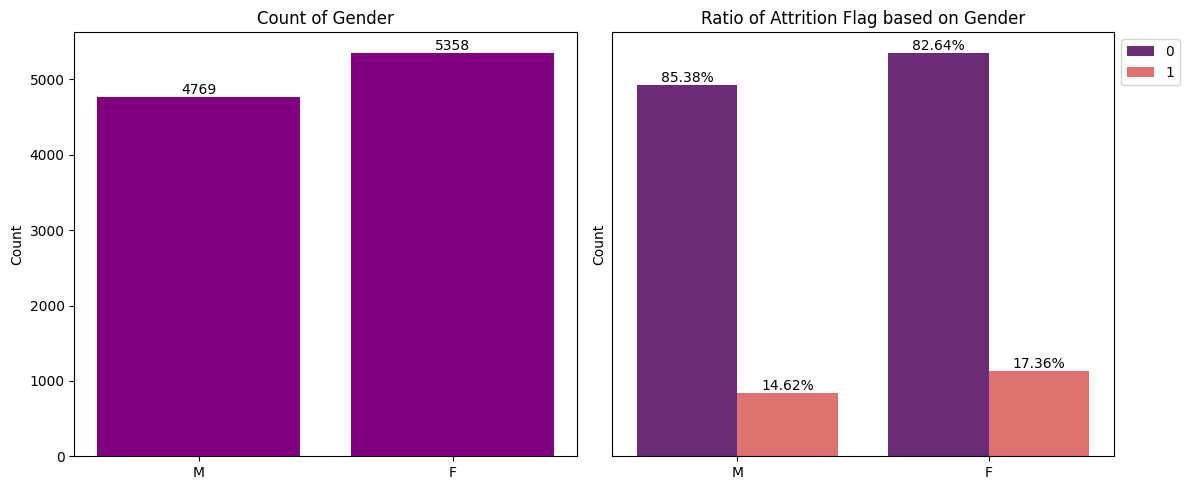

In [ ]:
name = 'Gender'
# Ensure consistent order for both plots
order = ['M', 'F']

# Left plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(order, [df[df[name] == cate].shape[0] for cate in order], color='purple')
plt.title('Count of ' + name)
plt.ylabel('Count')
plt.xticks(order)
for bar, cate in zip(bars, order):
    count = df[df[name] == cate].shape[0]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)

# Right plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x=name, hue='Attrition_Flag', order=order, palette='magma')
plt.title('Ratio of Attrition Flag based on ' + name)
plt.ylabel('Count')
ax.set_xlabel('')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.set_yticks([])

# Display the ratio of Attrition_Flag 0 and 1 for each gender category
for i, category in enumerate(order):
    total_count = df[df[name] == category].shape[0]
    attrition_0_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 0)])
    attrition_1_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 1)])

    ax.annotate(f'{attrition_0_count/total_count:.2%}',
                (i - 0.2, attrition_0_count), ha='center', va='bottom', color='black')
    ax.annotate(f'{attrition_1_count/total_count:.2%}',
                (i + 0.2, attrition_1_count), ha='center', va='bottom', color='black')

# Adjust legend location
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.rc('font', size=10, weight='normal')
plt.tight_layout()
plt.show()


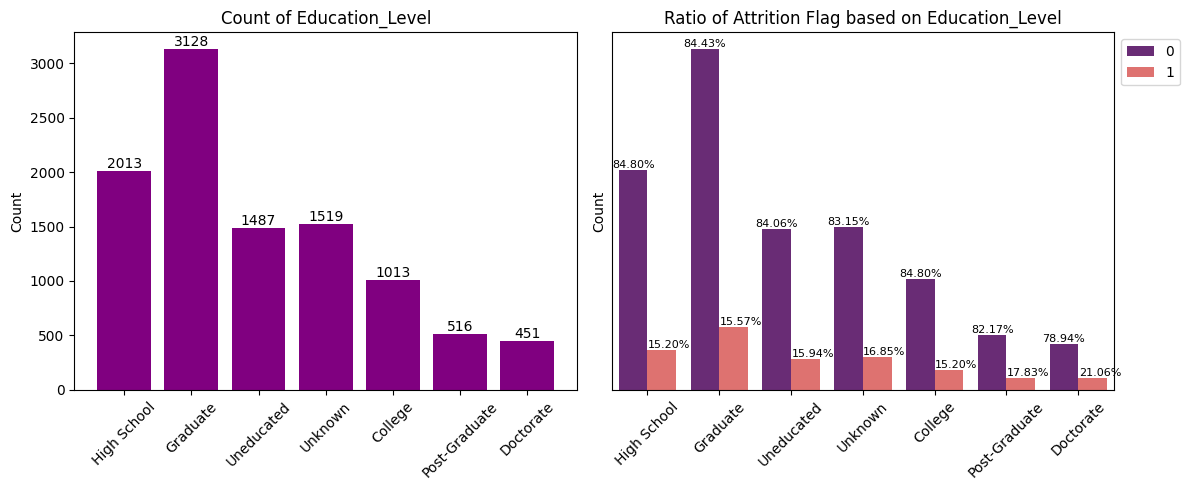

In [ ]:
name = 'Education_Level'
# Ensure consistent order for both plots
order = list(df[name].unique())

# Left plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(order, [df[df[name] == cate].shape[0] for cate in order], color='purple')
plt.title('Count of ' + name)
plt.ylabel('Count')
plt.xticks(order)
for bar, cate in zip(bars, order):
    count = df[df[name] == cate].shape[0]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
plt.xticks(order, rotation=45, fontsize = 10) # x축 눈금 레이블 설정

# Right plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x=name, hue='Attrition_Flag', order=order, palette='magma')
plt.title('Ratio of Attrition Flag based on ' + name)
plt.ylabel('Count')
ax.set_xlabel('')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.set_yticks([])
ax.set_xticklabels(order, rotation=45, fontsize = 10)  # x축 눈금 레이블 설정

# Display the ratio of Attrition_Flag 0 and 1 for each gender category
for i, category in enumerate(order):
    total_count = df[df[name] == category].shape[0]
    attrition_0_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 0)])
    attrition_1_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 1)])

    ax.annotate(f'{attrition_0_count/total_count:.2%}',
                (i - 0.2, attrition_0_count), ha='center', va='bottom', color='black', fontsize=8)
    ax.annotate(f'{attrition_1_count/total_count:.2%}',
                (i + 0.3, attrition_1_count), ha='center', va='bottom', color='black', fontsize=8)

# Adjust legend location
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

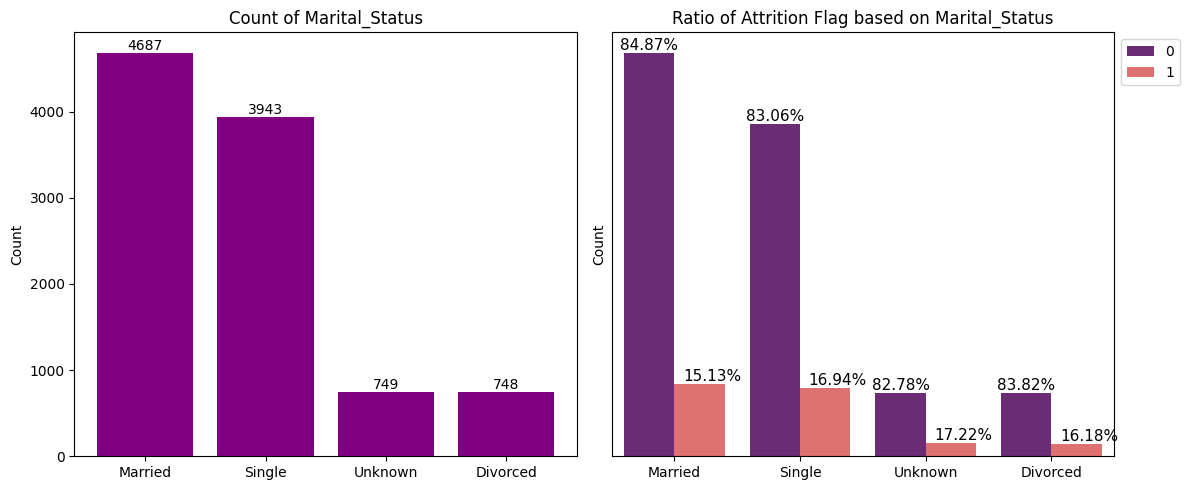

In [ ]:
name = 'Marital_Status'
# Ensure consistent order for both plots
order = list(df[name].unique())

# Left plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(order, [df[df[name] == cate].shape[0] for cate in order], color='purple')
plt.title('Count of ' + name)
plt.ylabel('Count')
plt.xticks(order)
for bar, cate in zip(bars, order):
    count = df[df[name] == cate].shape[0]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
#plt.xticks(order, rotation=45) # x축 눈금 레이블 설정

# Right plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x=name, hue='Attrition_Flag', order=order, palette='magma')
plt.title('Ratio of Attrition Flag based on ' + name)
plt.ylabel('Count')
ax.set_xlabel('')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.set_yticks([])
#ax.set_xticklabels(order, rotation=45)  # x축 눈금 레이블 설정

# Display the ratio of Attrition_Flag 0 and 1 for each gender category
for i, category in enumerate(order):
    total_count = df[df[name] == category].shape[0]
    attrition_0_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 0)])
    attrition_1_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 1)])

    ax.annotate(f'{attrition_0_count/total_count:.2%}',
                (i - 0.2, attrition_0_count), ha='center', va='bottom', color='black', fontsize=11)
    ax.annotate(f'{attrition_1_count/total_count:.2%}',
                (i + 0.3, attrition_1_count), ha='center', va='bottom', color='black', fontsize=11)

# Adjust legend location
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

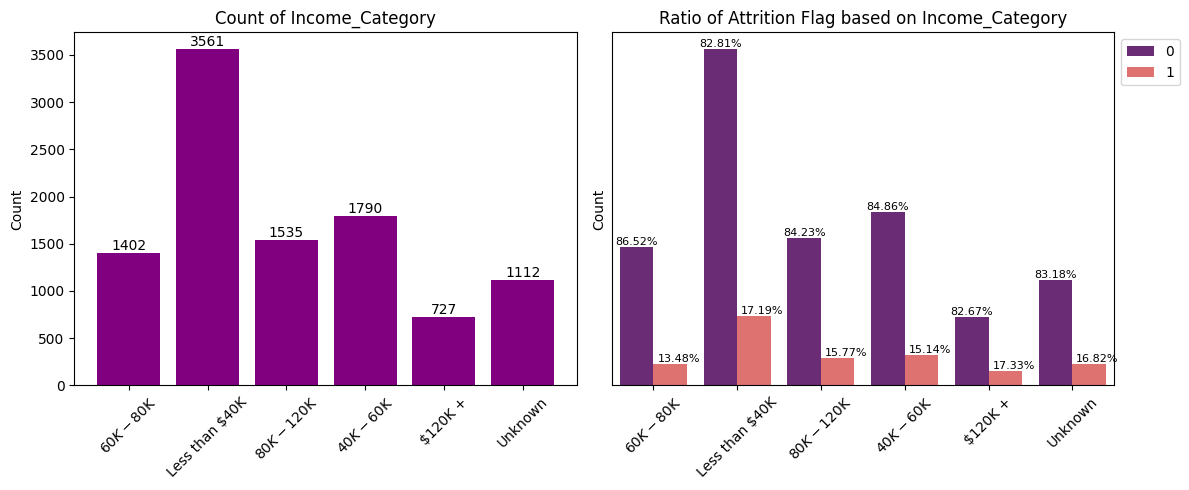

In [ ]:
name = 'Income_Category'
# Ensure consistent order for both plots
order = list(df[name].unique())

# Left plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(order, [df[df[name] == cate].shape[0] for cate in order], color='purple')
plt.title('Count of ' + name)
plt.ylabel('Count')
plt.xticks(order)
for bar, cate in zip(bars, order):
    count = df[df[name] == cate].shape[0]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
plt.xticks(order, rotation=45, fontsize = 10) # x축 눈금 레이블 설정

# Right plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x=name, hue='Attrition_Flag', order=order, palette='magma')
plt.title('Ratio of Attrition Flag based on ' + name)
plt.ylabel('Count')
ax.set_xlabel('')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.set_yticks([])
ax.set_xticklabels(order, rotation=45, fontsize = 10)  # x축 눈금 레이블 설정

# Display the ratio of Attrition_Flag 0 and 1 for each gender category
for i, category in enumerate(order):
    total_count = df[df[name] == category].shape[0]
    attrition_0_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 0)])
    attrition_1_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 1)])

    ax.annotate(f'{attrition_0_count/total_count:.2%}',
                (i - 0.2, attrition_0_count), ha='center', va='bottom', color='black', fontsize=8)
    ax.annotate(f'{attrition_1_count/total_count:.2%}',
                (i + 0.3, attrition_1_count), ha='center', va='bottom', color='black', fontsize=8)

# Adjust legend location
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

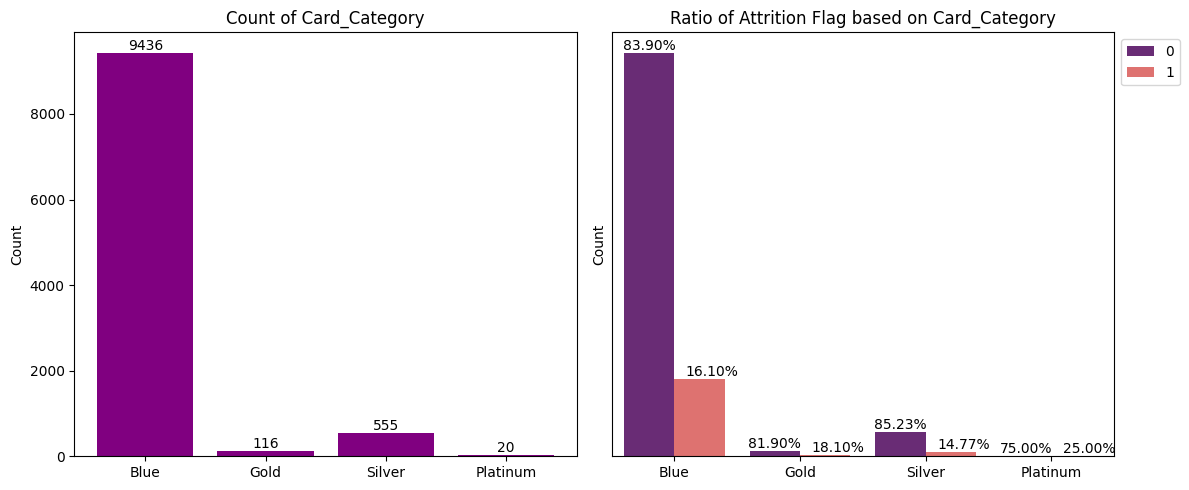

In [ ]:
name = 'Card_Category'
# Ensure consistent order for both plots
order = list(df[name].unique())

# Left plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(order, [df[df[name] == cate].shape[0] for cate in order], color='purple')
plt.title('Count of ' + name)
plt.ylabel('Count')
plt.xticks(order)
for bar, cate in zip(bars, order):
    count = df[df[name] == cate].shape[0]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
#plt.xticks(order, rotation=45, fontsize = 10) # x축 눈금 레이블 설정

# Right plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x=name, hue='Attrition_Flag', order=order, palette='magma')
plt.title('Ratio of Attrition Flag based on ' + name)
plt.ylabel('Count')
ax.set_xlabel('')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.set_yticks([])
#ax.set_xticklabels(order, rotation=45, fontsize = 10)  # x축 눈금 레이블 설정

# Display the ratio of Attrition_Flag 0 and 1 for each gender category
for i, category in enumerate(order):
    total_count = df[df[name] == category].shape[0]
    attrition_0_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 0)])
    attrition_1_count = len(df[(df[name] == category) & (df['Attrition_Flag'] == 1)])

    ax.annotate(f'{attrition_0_count/total_count:.2%}',
                (i - 0.2, attrition_0_count), ha='center', va='bottom', color='black', fontsize=10)
    ax.annotate(f'{attrition_1_count/total_count:.2%}',
                (i + 0.3, attrition_1_count), ha='center', va='bottom', color='black', fontsize=10)

# Adjust legend location
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

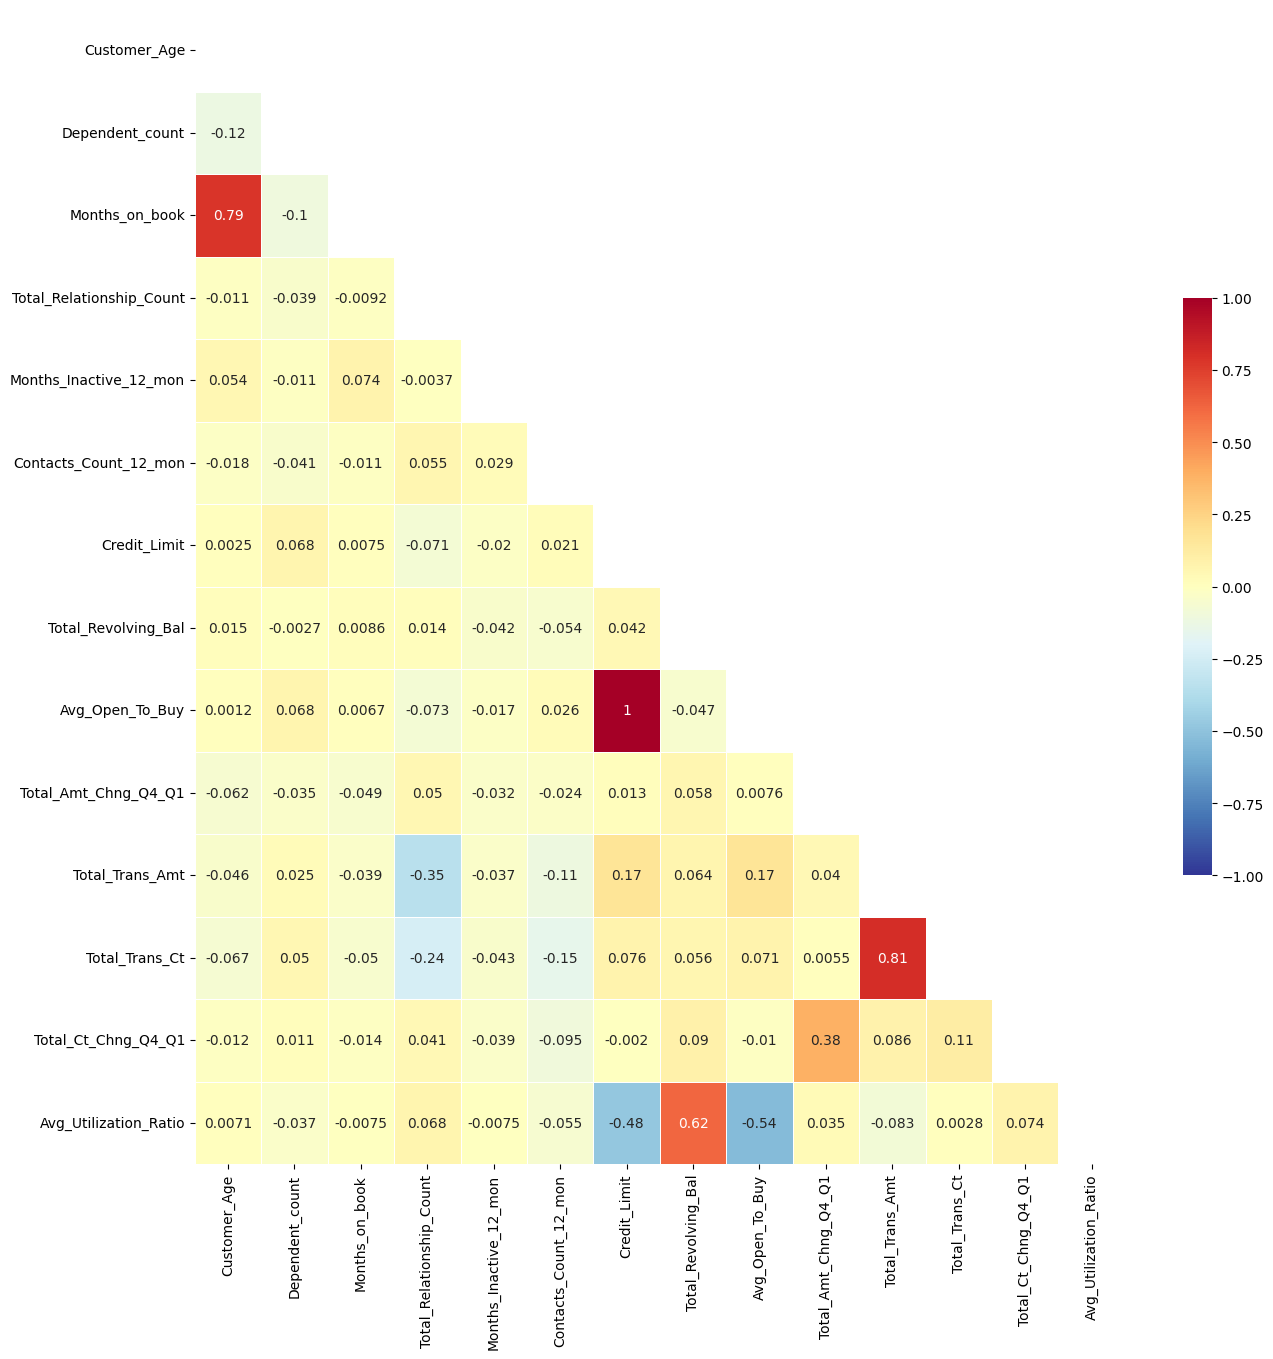

In [ ]:
# 수치형 변수 확인
numerical_list = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
                  'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy',
                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                  'Avg_Utilization_Ratio']

df1 = df[numerical_list]
corrr = df1.corr()
fig, ax = plt.subplots( figsize=(15,15) )
# 삼각형 마스크를 만든다.
mask = np.zeros_like(corrr)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corrr,cmap = 'RdYlBu_r', annot = True,mask=mask,linewidths=.5,cbar_kws={"shrink": .5},vmin = -1,vmax = 1)
plt.show()

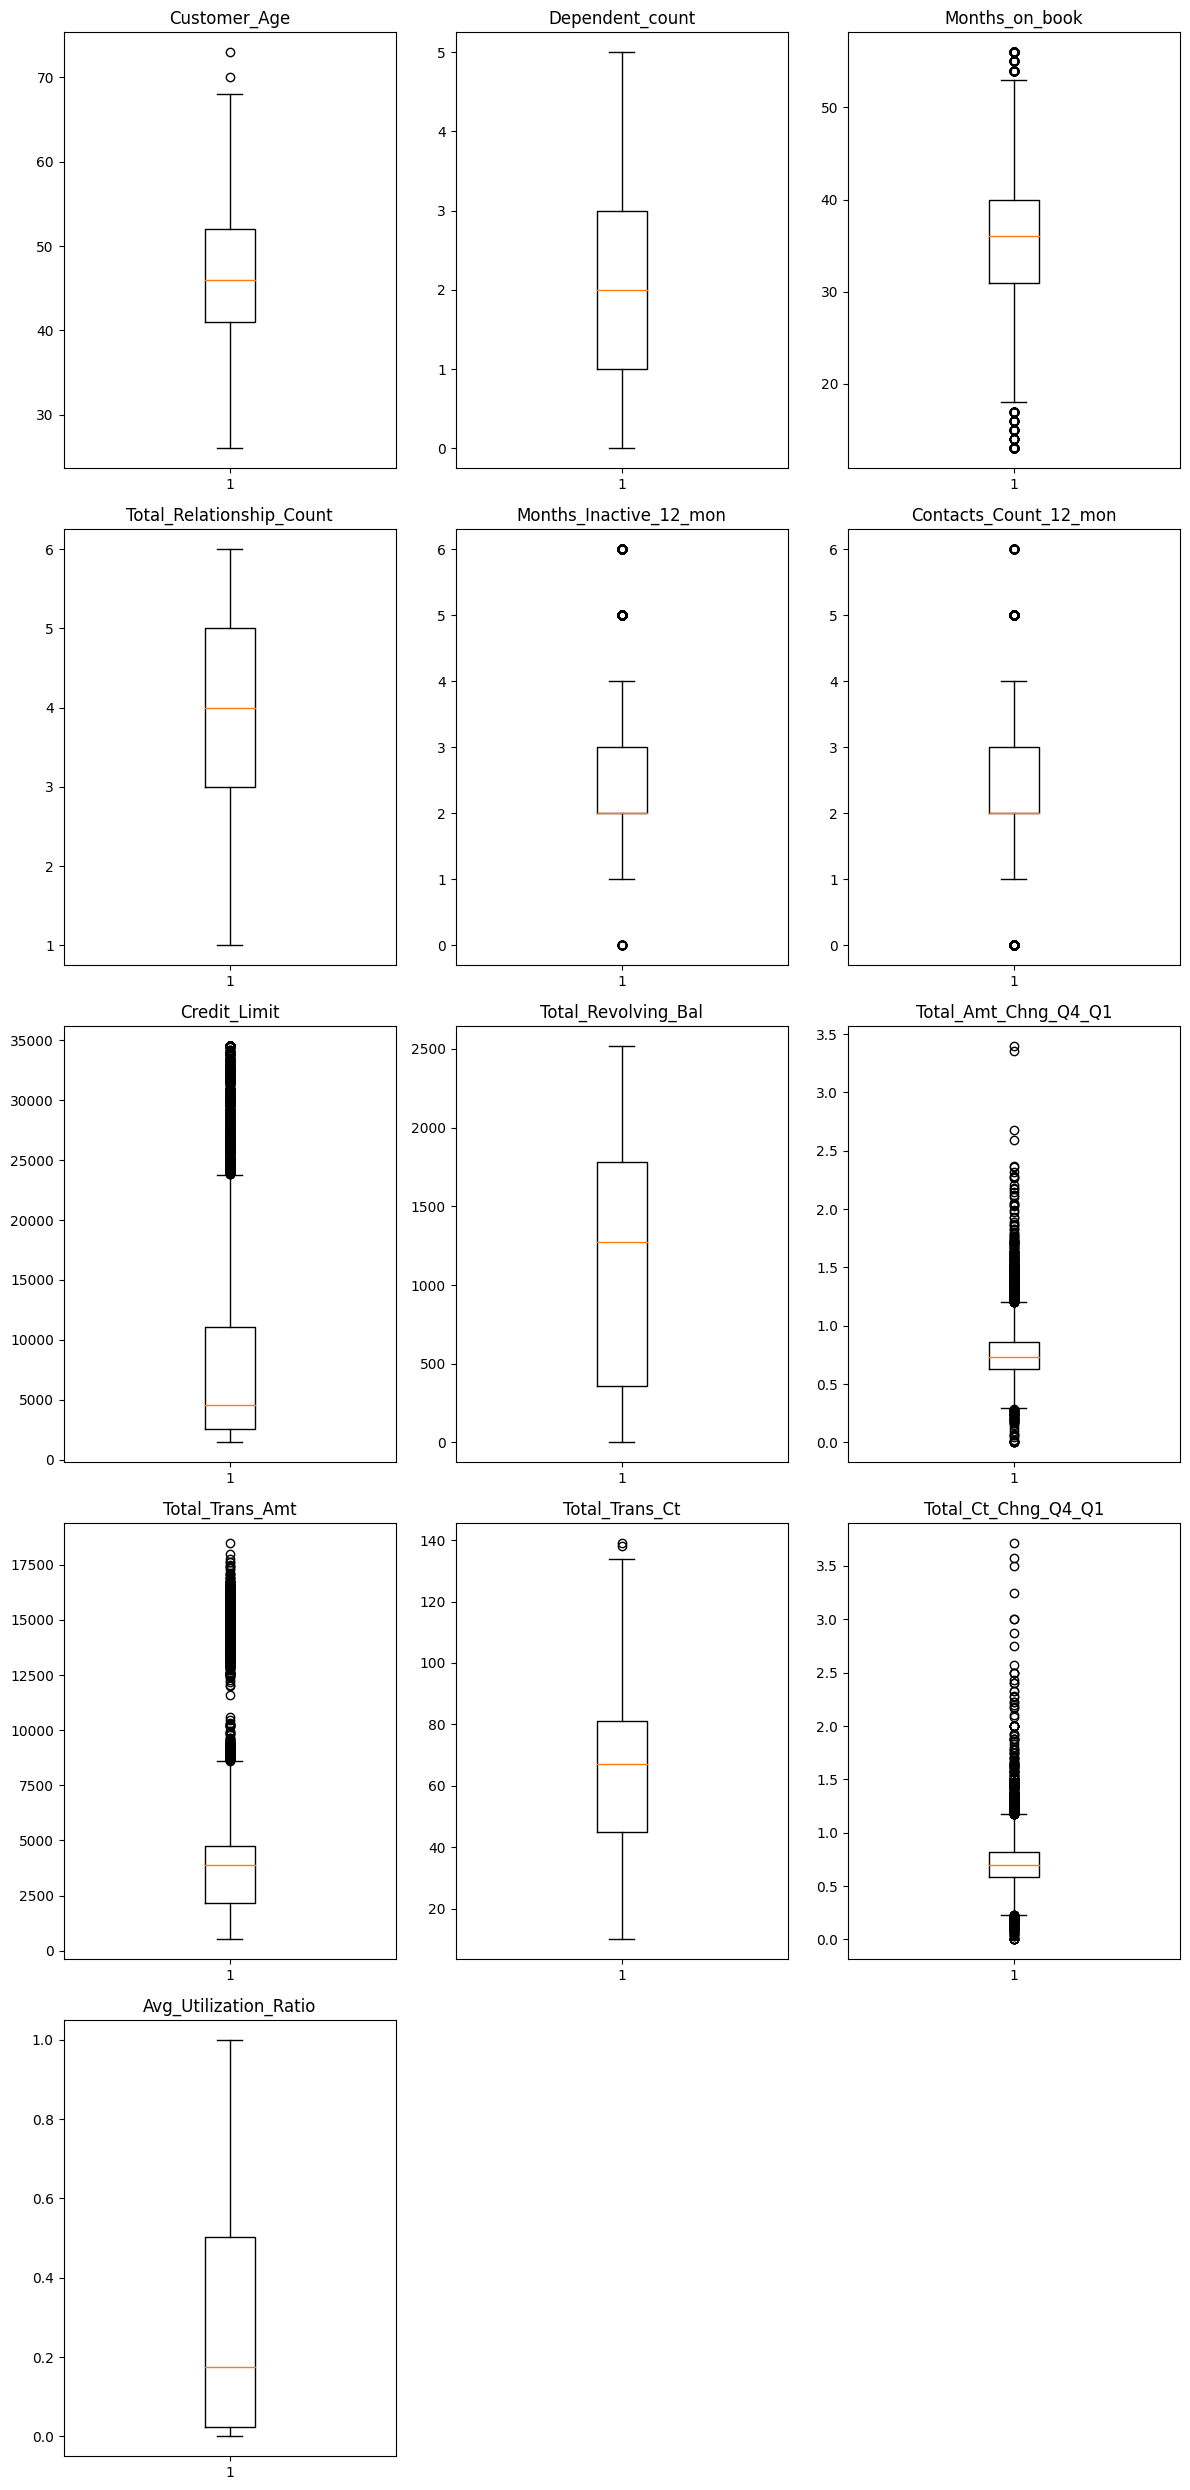

13


In [ ]:
# 수치형 변수 확인
numerical_list = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
                  'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                  'Avg_Utilization_Ratio']

# 5x3 서브플롯 생성
fig, axes = plt.subplots(5, 3, figsize=(12, 25))
for i, ax in enumerate(axes.ravel()):
    if i < len(numerical_list):
        tmp_df = df[numerical_list[i]]
        ax.boxplot(tmp_df)
        ax.set_title(numerical_list[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
print(len(numerical_list))

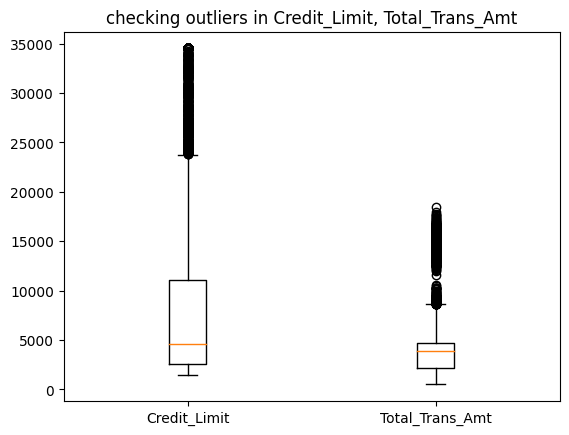

In [ ]:
# 이상치가 매우 심한 상황에 대해 따로
plt.boxplot(df[['Credit_Limit','Total_Trans_Amt']],labels=['Credit_Limit','Total_Trans_Amt'])
plt.title('checking outliers in Credit_Limit, Total_Trans_Amt');

In [ ]:
# 이상치 처리 (q4 지점 위쪽 부분 q4로 만듦)
def optimise_higher_values(n):
    if n>=upper_limit:
        return upper_limit
    return n

In [ ]:
cols = ['Credit_Limit','Total_Trans_Amt']

for i in cols:
    perc_25 = df[i].quantile(.25)
    perc_75 = df[i].quantile(.75)

    iqr = perc_75 - perc_25

    upper_limit = perc_75 + 1.5 * iqr
    df[i]=df[i].apply(optimise_higher_values)

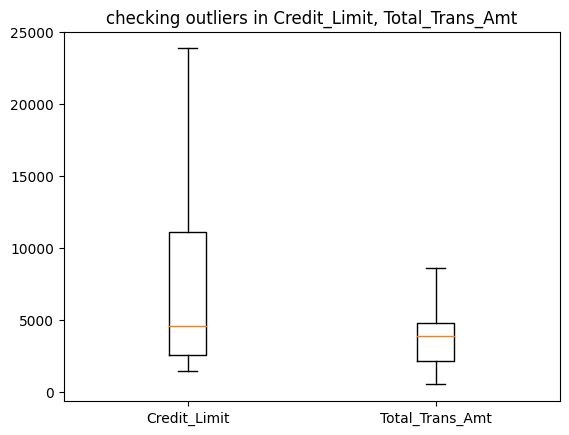

In [ ]:
# 이상치 처리 후 box plot
plt.boxplot(df[['Credit_Limit','Total_Trans_Amt']],labels=['Credit_Limit','Total_Trans_Amt'])
plt.title('checking outliers in Credit_Limit, Total_Trans_Amt');